In [0]:
# Base de datos
import sqlite3

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Visualización
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools

In [0]:
conn = sqlite3.connect('mall_customer.db')
conn.execute('''
  CREATE TABLE IF NOT EXISTS mall_customer(
    CustomerID integer,
    Gender varchar(8),
    Age integer,
    Annual_Income integer,
    Spending_Score integer
  );
'''
)

conn.execute("INSERT INTO mall_customer VALUES(2,'Male',21,15,81);")
conn.execute("INSERT INTO mall_customer VALUES(1,'Male',19,15,39);")
conn.execute("INSERT INTO mall_customer VALUES(3,'Female',20,16,6);")
conn.execute("INSERT INTO mall_customer VALUES(4,'Female',23,16,77);")
conn.execute("INSERT INTO mall_customer VALUES(5,'Female',31,17,40);")
conn.execute("INSERT INTO mall_customer VALUES(6,'Female',22,17,76);")
conn.execute("INSERT INTO mall_customer VALUES(7,'Female',35,18,6);")
conn.execute("INSERT INTO mall_customer VALUES(8,'Female',23,18,94);")
conn.execute("INSERT INTO mall_customer VALUES(9,'Male',64,19,3);")
conn.execute("INSERT INTO mall_customer VALUES(10,'Female',30,19,72);")
conn.execute("INSERT INTO mall_customer VALUES(11,'Male',67,19,14);")
conn.execute("INSERT INTO mall_customer VALUES(12,'Female',35,19,99);")
conn.execute("INSERT INTO mall_customer VALUES(13,'Female',58,20,15);")
conn.execute("INSERT INTO mall_customer VALUES(14,'Female',24,20,77);")
conn.execute("INSERT INTO mall_customer VALUES(15,'Male',37,20,13);")
conn.execute("INSERT INTO mall_customer VALUES(16,'Male',22,20,79);")
conn.execute("INSERT INTO mall_customer VALUES(17,'Female',35,21,35);")
conn.execute("INSERT INTO mall_customer VALUES(18,'Male',20,21,66);")
conn.execute("INSERT INTO mall_customer VALUES(19,'Male',52,23,29);")
conn.execute("INSERT INTO mall_customer VALUES(20,'Female',35,23,98);")
conn.execute("INSERT INTO mall_customer VALUES(21,'Male',35,24,35);")
conn.execute("INSERT INTO mall_customer VALUES(22,'Male',25,24,73);")
conn.execute("INSERT INTO mall_customer VALUES(23,'Female',46,25,5);")
conn.execute("INSERT INTO mall_customer VALUES(24,'Male',31,25,73);")
conn.execute("INSERT INTO mall_customer VALUES(25,'Female',54,28,14);")
conn.execute("INSERT INTO mall_customer VALUES(26,'Male',29,28,82);")
conn.execute("INSERT INTO mall_customer VALUES(27,'Female',45,28,32);")
conn.execute("INSERT INTO mall_customer VALUES(28,'Male',35,28,61);")
conn.execute("INSERT INTO mall_customer VALUES(29,'Female',40,29,31);")
conn.execute("INSERT INTO mall_customer VALUES(30,'Female',23,29,87);")
conn.execute("INSERT INTO mall_customer VALUES(31,'Male',60,30,4);")
conn.execute("INSERT INTO mall_customer VALUES(32,'Female',21,30,73);")
conn.execute("INSERT INTO mall_customer VALUES(33,'Male',53,33,4);")
conn.execute("INSERT INTO mall_customer VALUES(34,'Male',18,33,92);")
conn.execute("INSERT INTO mall_customer VALUES(35,'Female',49,33,14);")
conn.execute("INSERT INTO mall_customer VALUES(36,'Female',21,33,81);")
conn.execute("INSERT INTO mall_customer VALUES(37,'Female',42,34,17);")
conn.execute("INSERT INTO mall_customer VALUES(38,'Female',30,34,73);")
conn.execute("INSERT INTO mall_customer VALUES(39,'Female',36,37,26);")
conn.execute("INSERT INTO mall_customer VALUES(40,'Female',20,37,75);")
conn.execute("INSERT INTO mall_customer VALUES(41,'Female',65,38,35);")
conn.execute("INSERT INTO mall_customer VALUES(42,'Male',24,38,92);")
conn.execute("INSERT INTO mall_customer VALUES(43,'Male',48,39,36);")
conn.execute("INSERT INTO mall_customer VALUES(44,'Female',31,39,61);")
conn.execute("INSERT INTO mall_customer VALUES(45,'Female',49,39,28);")
conn.execute("INSERT INTO mall_customer VALUES(46,'Female',24,39,65);")
conn.execute("INSERT INTO mall_customer VALUES(47,'Female',50,40,55);")
conn.execute("INSERT INTO mall_customer VALUES(48,'Female',27,40,47);")
conn.execute("INSERT INTO mall_customer VALUES(49,'Female',29,40,42);")
conn.execute("INSERT INTO mall_customer VALUES(50,'Female',31,40,42);")
conn.execute("INSERT INTO mall_customer VALUES(51,'Female',49,42,52);")
conn.execute("INSERT INTO mall_customer VALUES(52,'Male',33,42,60);")
conn.execute("INSERT INTO mall_customer VALUES(53,'Female',31,43,54);")
conn.execute("INSERT INTO mall_customer VALUES(54,'Male',59,43,60);")
conn.execute("INSERT INTO mall_customer VALUES(55,'Female',50,43,45);")
conn.execute("INSERT INTO mall_customer VALUES(56,'Male',47,43,41);")
conn.execute("INSERT INTO mall_customer VALUES(57,'Female',51,44,50);")
conn.execute("INSERT INTO mall_customer VALUES(58,'Male',69,44,46);")
conn.execute("INSERT INTO mall_customer VALUES(59,'Female',27,46,51);")
conn.execute("INSERT INTO mall_customer VALUES(60,'Male',53,46,46);")
conn.execute("INSERT INTO mall_customer VALUES(61,'Male',70,46,56);")
conn.execute("INSERT INTO mall_customer VALUES(62,'Male',19,46,55);")
conn.execute("INSERT INTO mall_customer VALUES(63,'Female',67,47,52);")
conn.execute("INSERT INTO mall_customer VALUES(64,'Female',54,47,59);")
conn.execute("INSERT INTO mall_customer VALUES(65,'Male',63,48,51);")
conn.execute("INSERT INTO mall_customer VALUES(66,'Male',18,48,59);")
conn.execute("INSERT INTO mall_customer VALUES(67,'Female',43,48,50);")
conn.execute("INSERT INTO mall_customer VALUES(68,'Female',68,48,48);")
conn.execute("INSERT INTO mall_customer VALUES(69,'Male',19,48,59);")
conn.execute("INSERT INTO mall_customer VALUES(70,'Female',32,48,47);")
conn.execute("INSERT INTO mall_customer VALUES(71,'Male',70,49,55);")
conn.execute("INSERT INTO mall_customer VALUES(72,'Female',47,49,42);")
conn.execute("INSERT INTO mall_customer VALUES(73,'Female',60,50,49);")
conn.execute("INSERT INTO mall_customer VALUES(74,'Female',60,50,56);")
conn.execute("INSERT INTO mall_customer VALUES(75,'Male',59,54,47);")
conn.execute("INSERT INTO mall_customer VALUES(76,'Male',26,54,54);")
conn.execute("INSERT INTO mall_customer VALUES(77,'Female',45,54,53);")
conn.execute("INSERT INTO mall_customer VALUES(78,'Male',40,54,48);")
conn.execute("INSERT INTO mall_customer VALUES(79,'Female',23,54,52);")
conn.execute("INSERT INTO mall_customer VALUES(80,'Female',49,54,42);")
conn.execute("INSERT INTO mall_customer VALUES(81,'Male',57,54,51);")
conn.execute("INSERT INTO mall_customer VALUES(82,'Male',38,54,55);")
conn.execute("INSERT INTO mall_customer VALUES(83,'Male',67,54,41);")
conn.execute("INSERT INTO mall_customer VALUES(84,'Female',46,54,44);")
conn.execute("INSERT INTO mall_customer VALUES(85,'Female',21,54,57);")
conn.execute("INSERT INTO mall_customer VALUES(86,'Male',48,54,46);")
conn.execute("INSERT INTO mall_customer VALUES(87,'Female',55,57,58);")
conn.execute("INSERT INTO mall_customer VALUES(88,'Female',22,57,55);")
conn.execute("INSERT INTO mall_customer VALUES(89,'Female',34,58,60);")
conn.execute("INSERT INTO mall_customer VALUES(90,'Female',50,58,46);")
conn.execute("INSERT INTO mall_customer VALUES(91,'Female',68,59,55);")
conn.execute("INSERT INTO mall_customer VALUES(92,'Male',18,59,41);")
conn.execute("INSERT INTO mall_customer VALUES(93,'Male',48,60,49);")
conn.execute("INSERT INTO mall_customer VALUES(94,'Female',40,60,40);")
conn.execute("INSERT INTO mall_customer VALUES(95,'Female',32,60,42);")
conn.execute("INSERT INTO mall_customer VALUES(96,'Male',24,60,52);")
conn.execute("INSERT INTO mall_customer VALUES(97,'Female',47,60,47);")
conn.execute("INSERT INTO mall_customer VALUES(98,'Female',27,60,50);")
conn.execute("INSERT INTO mall_customer VALUES(99,'Male',48,61,42);")
conn.execute("INSERT INTO mall_customer VALUES(100,'Male',20,61,49);")
conn.execute("INSERT INTO mall_customer VALUES(101,'Female',23,62,41);")
conn.execute("INSERT INTO mall_customer VALUES(102,'Female',49,62,48);")
conn.execute("INSERT INTO mall_customer VALUES(103,'Male',67,62,59);")
conn.execute("INSERT INTO mall_customer VALUES(104,'Male',26,62,55);")
conn.execute("INSERT INTO mall_customer VALUES(105,'Male',49,62,56);")
conn.execute("INSERT INTO mall_customer VALUES(106,'Female',21,62,42);")
conn.execute("INSERT INTO mall_customer VALUES(107,'Female',66,63,50);")
conn.execute("INSERT INTO mall_customer VALUES(108,'Male',54,63,46);")
conn.execute("INSERT INTO mall_customer VALUES(109,'Male',68,63,43);")
conn.execute("INSERT INTO mall_customer VALUES(110,'Male',66,63,48);")
conn.execute("INSERT INTO mall_customer VALUES(111,'Male',65,63,52);")
conn.execute("INSERT INTO mall_customer VALUES(112,'Female',19,63,54);")
conn.execute("INSERT INTO mall_customer VALUES(113,'Female',38,64,42);")
conn.execute("INSERT INTO mall_customer VALUES(114,'Male',19,64,46);")
conn.execute("INSERT INTO mall_customer VALUES(115,'Female',18,65,48);")
conn.execute("INSERT INTO mall_customer VALUES(116,'Female',19,65,50);")
conn.execute("INSERT INTO mall_customer VALUES(117,'Female',63,65,43);")
conn.execute("INSERT INTO mall_customer VALUES(118,'Female',49,65,59);")
conn.execute("INSERT INTO mall_customer VALUES(119,'Female',51,67,43);")
conn.execute("INSERT INTO mall_customer VALUES(120,'Female',50,67,57);")
conn.execute("INSERT INTO mall_customer VALUES(121,'Male',27,67,56);")
conn.execute("INSERT INTO mall_customer VALUES(122,'Female',38,67,40);")
conn.execute("INSERT INTO mall_customer VALUES(123,'Female',40,69,58);")
conn.execute("INSERT INTO mall_customer VALUES(124,'Male',39,69,91);")
conn.execute("INSERT INTO mall_customer VALUES(125,'Female',23,70,29);")
conn.execute("INSERT INTO mall_customer VALUES(126,'Female',31,70,77);")
conn.execute("INSERT INTO mall_customer VALUES(127,'Male',43,71,35);")
conn.execute("INSERT INTO mall_customer VALUES(128,'Male',40,71,95);")
conn.execute("INSERT INTO mall_customer VALUES(129,'Male',59,71,11);")
conn.execute("INSERT INTO mall_customer VALUES(130,'Male',38,71,75);")
conn.execute("INSERT INTO mall_customer VALUES(131,'Male',47,71,9);")
conn.execute("INSERT INTO mall_customer VALUES(132,'Male',39,71,75);")
conn.execute("INSERT INTO mall_customer VALUES(133,'Female',25,72,34);")
conn.execute("INSERT INTO mall_customer VALUES(134,'Female',31,72,71);")
conn.execute("INSERT INTO mall_customer VALUES(135,'Male',20,73,5);")
conn.execute("INSERT INTO mall_customer VALUES(136,'Female',29,73,88);")
conn.execute("INSERT INTO mall_customer VALUES(137,'Female',44,73,7);")
conn.execute("INSERT INTO mall_customer VALUES(138,'Male',32,73,73);")
conn.execute("INSERT INTO mall_customer VALUES(139,'Male',19,74,10);")
conn.execute("INSERT INTO mall_customer VALUES(140,'Female',35,74,72);")
conn.execute("INSERT INTO mall_customer VALUES(141,'Female',57,75,5);")
conn.execute("INSERT INTO mall_customer VALUES(142,'Male',32,75,93);")
conn.execute("INSERT INTO mall_customer VALUES(143,'Female',28,76,40);")
conn.execute("INSERT INTO mall_customer VALUES(144,'Female',32,76,87);")
conn.execute("INSERT INTO mall_customer VALUES(145,'Male',25,77,12);")
conn.execute("INSERT INTO mall_customer VALUES(146,'Male',28,77,97);")
conn.execute("INSERT INTO mall_customer VALUES(147,'Male',48,77,36);")
conn.execute("INSERT INTO mall_customer VALUES(148,'Female',32,77,74);")
conn.execute("INSERT INTO mall_customer VALUES(149,'Female',34,78,22);")
conn.execute("INSERT INTO mall_customer VALUES(150,'Male',34,78,90);")
conn.execute("INSERT INTO mall_customer VALUES(151,'Male',43,78,17);")
conn.execute("INSERT INTO mall_customer VALUES(152,'Male',39,78,88);")
conn.execute("INSERT INTO mall_customer VALUES(153,'Female',44,78,20);")
conn.execute("INSERT INTO mall_customer VALUES(154,'Female',38,78,76);")
conn.execute("INSERT INTO mall_customer VALUES(155,'Female',47,78,16);")
conn.execute("INSERT INTO mall_customer VALUES(156,'Female',27,78,89);")
conn.execute("INSERT INTO mall_customer VALUES(157,'Male',37,78,1);")
conn.execute("INSERT INTO mall_customer VALUES(158,'Female',30,78,78);")
conn.execute("INSERT INTO mall_customer VALUES(159,'Male',34,78,1);")
conn.execute("INSERT INTO mall_customer VALUES(160,'Female',30,78,73);")
conn.execute("INSERT INTO mall_customer VALUES(161,'Female',56,79,35);")
conn.execute("INSERT INTO mall_customer VALUES(162,'Female',29,79,83);")
conn.execute("INSERT INTO mall_customer VALUES(163,'Male',19,81,5);")
conn.execute("INSERT INTO mall_customer VALUES(164,'Female',31,81,93);")
conn.execute("INSERT INTO mall_customer VALUES(165,'Male',50,85,26);")
conn.execute("INSERT INTO mall_customer VALUES(166,'Female',36,85,75);")
conn.execute("INSERT INTO mall_customer VALUES(167,'Male',42,86,20);")
conn.execute("INSERT INTO mall_customer VALUES(168,'Female',33,86,95);")
conn.execute("INSERT INTO mall_customer VALUES(169,'Female',36,87,27);")
conn.execute("INSERT INTO mall_customer VALUES(170,'Male',32,87,63);")
conn.execute("INSERT INTO mall_customer VALUES(171,'Male',40,87,13);")
conn.execute("INSERT INTO mall_customer VALUES(172,'Male',28,87,75);")
conn.execute("INSERT INTO mall_customer VALUES(173,'Male',36,87,10);")
conn.execute("INSERT INTO mall_customer VALUES(174,'Male',36,87,92);")
conn.execute("INSERT INTO mall_customer VALUES(175,'Female',52,88,13);")
conn.execute("INSERT INTO mall_customer VALUES(176,'Female',30,88,86);")
conn.execute("INSERT INTO mall_customer VALUES(177,'Male',58,88,15);")
conn.execute("INSERT INTO mall_customer VALUES(178,'Male',27,88,69);")
conn.execute("INSERT INTO mall_customer VALUES(179,'Male',59,93,14);")
conn.execute("INSERT INTO mall_customer VALUES(180,'Male',35,93,90);")
conn.execute("INSERT INTO mall_customer VALUES(181,'Female',37,97,32);")
conn.execute("INSERT INTO mall_customer VALUES(182,'Female',32,97,86);")
conn.execute("INSERT INTO mall_customer VALUES(183,'Male',46,98,15);")
conn.execute("INSERT INTO mall_customer VALUES(184,'Female',29,98,88);")
conn.execute("INSERT INTO mall_customer VALUES(185,'Female',41,99,39);")
conn.execute("INSERT INTO mall_customer VALUES(186,'Male',30,99,97);")
conn.execute("INSERT INTO mall_customer VALUES(187,'Female',54,101,24);")
conn.execute("INSERT INTO mall_customer VALUES(188,'Male',28,101,68);")
conn.execute("INSERT INTO mall_customer VALUES(189,'Female',41,103,17);")
conn.execute("INSERT INTO mall_customer VALUES(190,'Female',36,103,85);")
conn.execute("INSERT INTO mall_customer VALUES(191,'Female',34,103,23);")
conn.execute("INSERT INTO mall_customer VALUES(192,'Female',32,103,69);")
conn.execute("INSERT INTO mall_customer VALUES(193,'Male',33,113,8);")
conn.execute("INSERT INTO mall_customer VALUES(194,'Female',38,113,91);")
conn.execute("INSERT INTO mall_customer VALUES(195,'Female',47,120,16);")
conn.execute("INSERT INTO mall_customer VALUES(196,'Female',35,120,79);")
conn.execute("INSERT INTO mall_customer VALUES(197,'Female',45,126,28);")
conn.execute("INSERT INTO mall_customer VALUES(198,'Male',32,126,74);")
conn.execute("INSERT INTO mall_customer VALUES(199,'Male',32,137,18);")
conn.execute("INSERT INTO mall_customer VALUES(200,'Male',30,137,83);")

conn.commit()

In [0]:
df = pd.read_sql("SELECT * FROM mall_customer", conn)

In [0]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,2,Male,21,15,81
1,1,Male,19,15,39
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


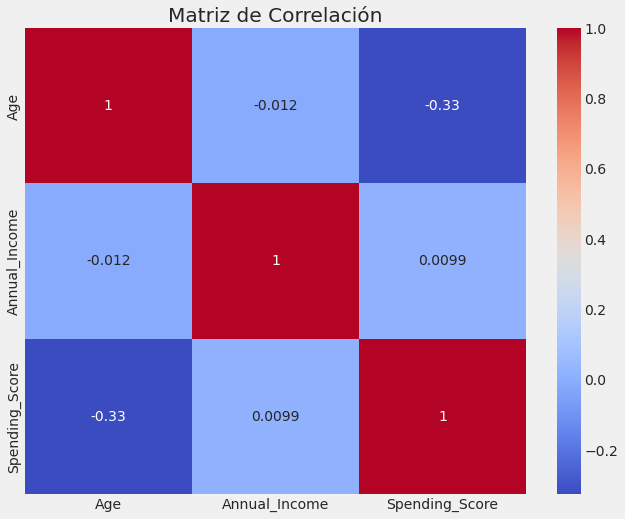

In [0]:
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
df2=df.drop('CustomerID',axis=1)
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [0]:
# Seleccionar las columnas para el clustering
features = df[['Age', 'Annual_Income', 'Spending_Score']]

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

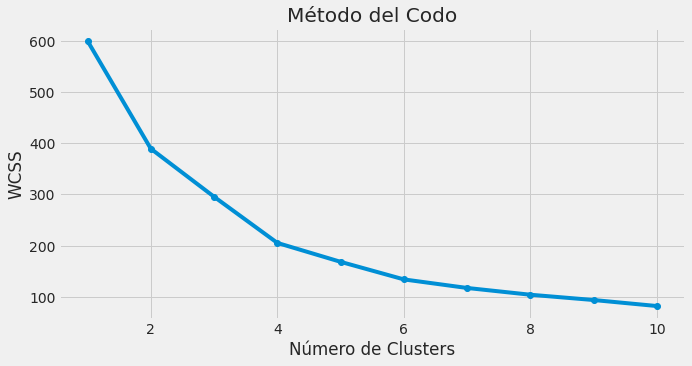

In [0]:
# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

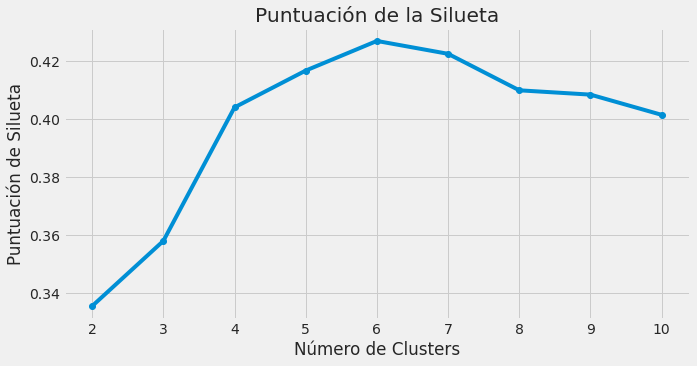

In [0]:
# Puntuación de la silueta
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.show()

In [0]:
# Clustering con KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

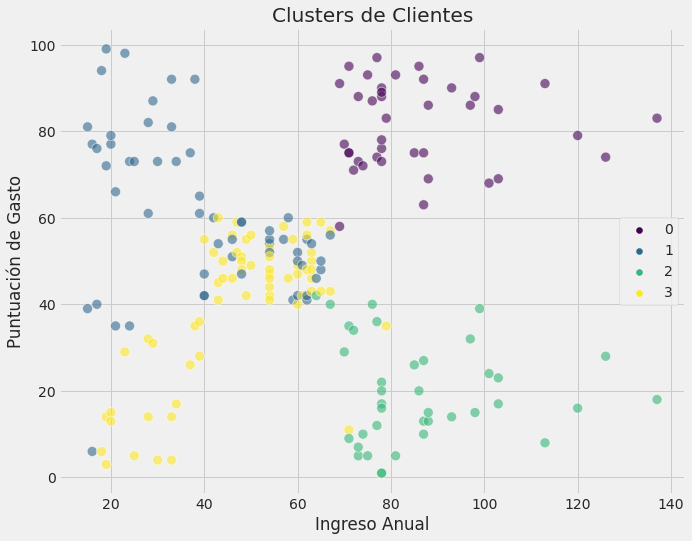

In [0]:
# Visualización en 2D usando 'Annual_Income' y 'Spending_Score'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.legend()
plt.show()


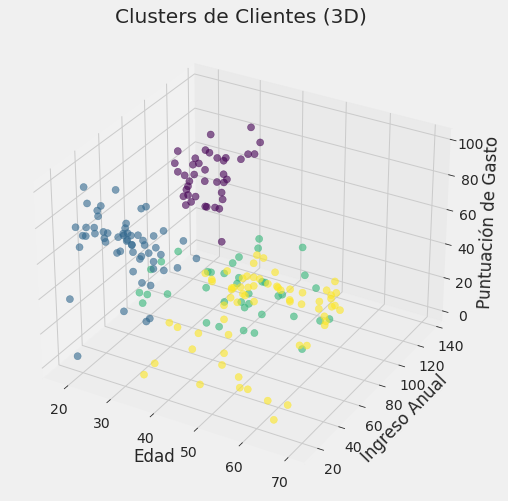

In [0]:

# Si se quiere visualizar en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual')
ax.set_zlabel('Puntuación de Gasto')
plt.title('Clusters de Clientes (3D)')
plt.show()

In [0]:
# Resumen de los clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age  Annual_Income  Spending_Score
Cluster                                                      
0        161.025000  32.875000      86.100000       81.525000
1         53.438596  25.438596      40.000000       60.298246
2        160.552632  39.368421      86.500000       19.578947
3         69.415385  53.984615      47.707692       39.969231


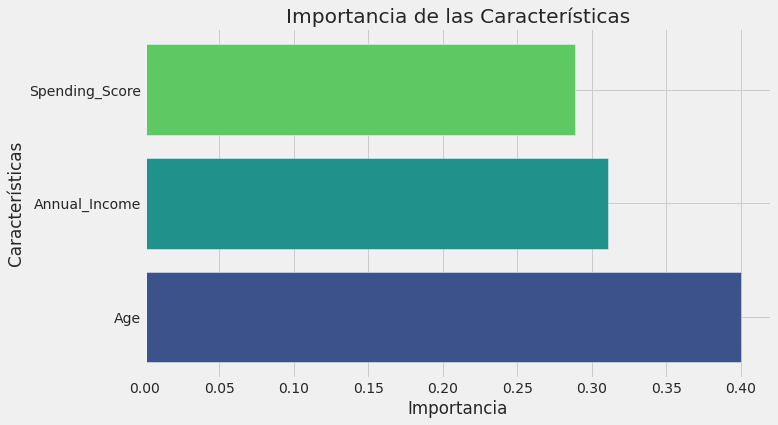

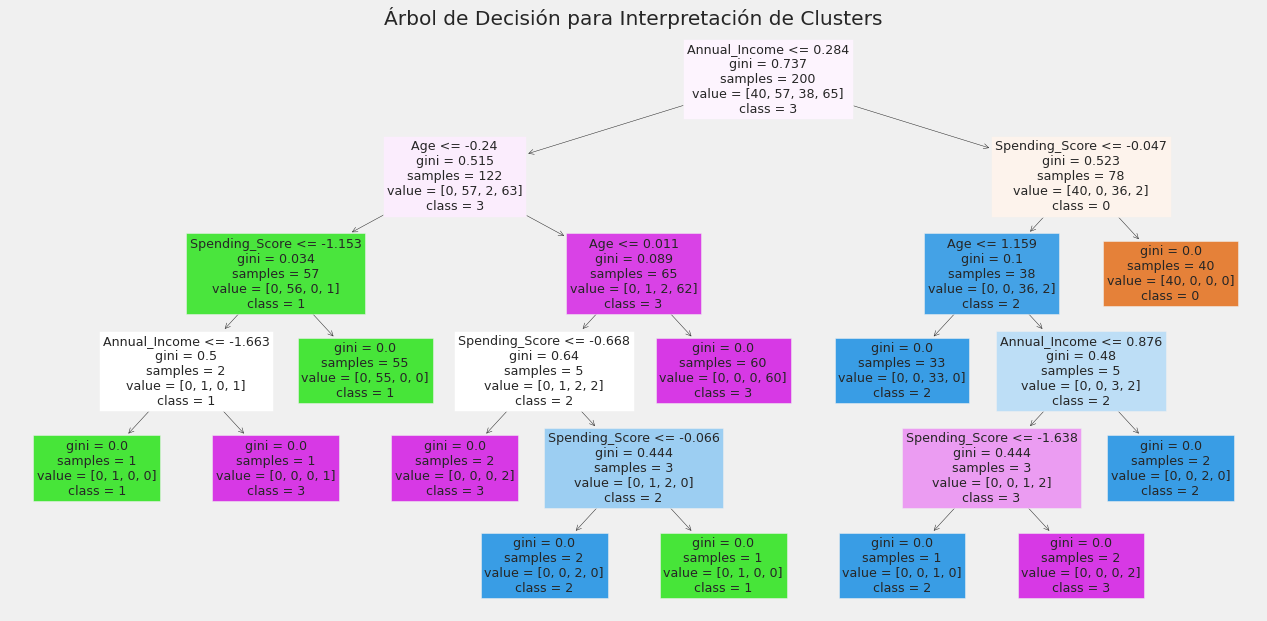

In [0]:
# Análisis de la Importancia de las Variables
# Usaremos un árbol de decisión para determinar la importancia de las características
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Preparar los datos
X = scaled_features
y = df['Cluster']

# Entrenar el modelo
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', n_colors=3)
plt.barh(['Age', 'Annual_Income', 'Spending_Score'], tree.feature_importances_, color=colors)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=['Age', 'Annual_Income', 'Spending_Score'], class_names=[str(i) for i in range(4)], filled=True)
plt.title('Árbol de Decisión para Interpretación de Clusters')
plt.show()

## interpretacion


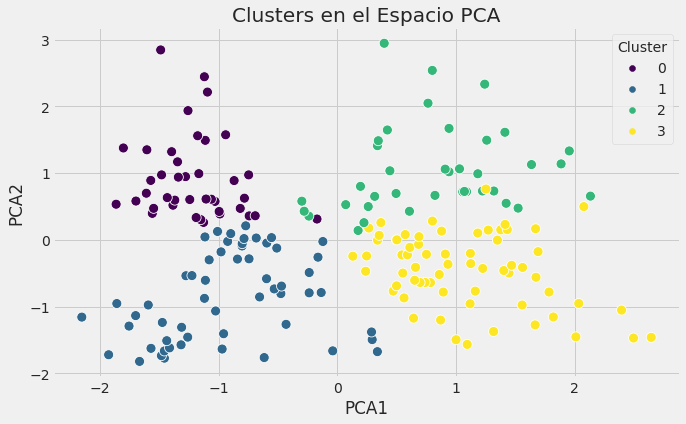

In [0]:

# PCA para reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Visualización de los clusters en el espacio PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters en el Espacio PCA')
plt.show()

<Figure size 720x432 with 0 Axes>

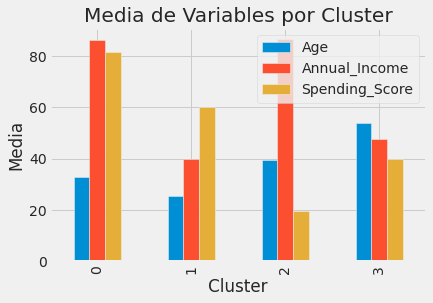

In [0]:

# Gráficos de barras para la interpretación de los clusters con respecto a las variables
cluster_summary = df.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
cluster_summary[['Age', 'Annual_Income', 'Spending_Score']].plot(kind='bar')
plt.title('Media de Variables por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Media')
plt.show()


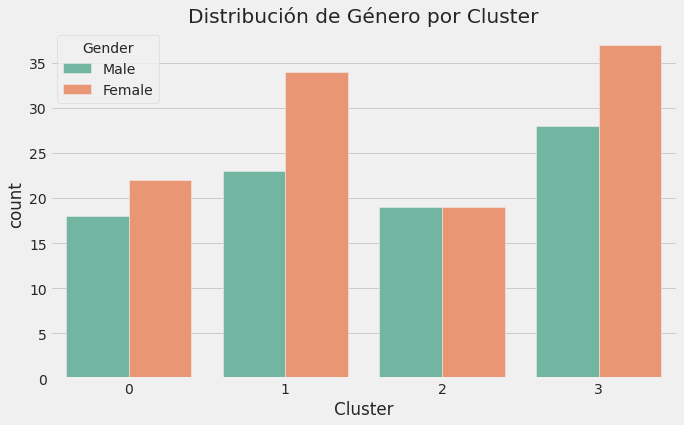

In [0]:

# Visualización de la distribución de género por cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender', palette='Set2')
plt.title('Distribución de Género por Cluster')
plt.show()

Out[33]: Text(0.5, 1.0, 'Distribución de Edad por Cluster')

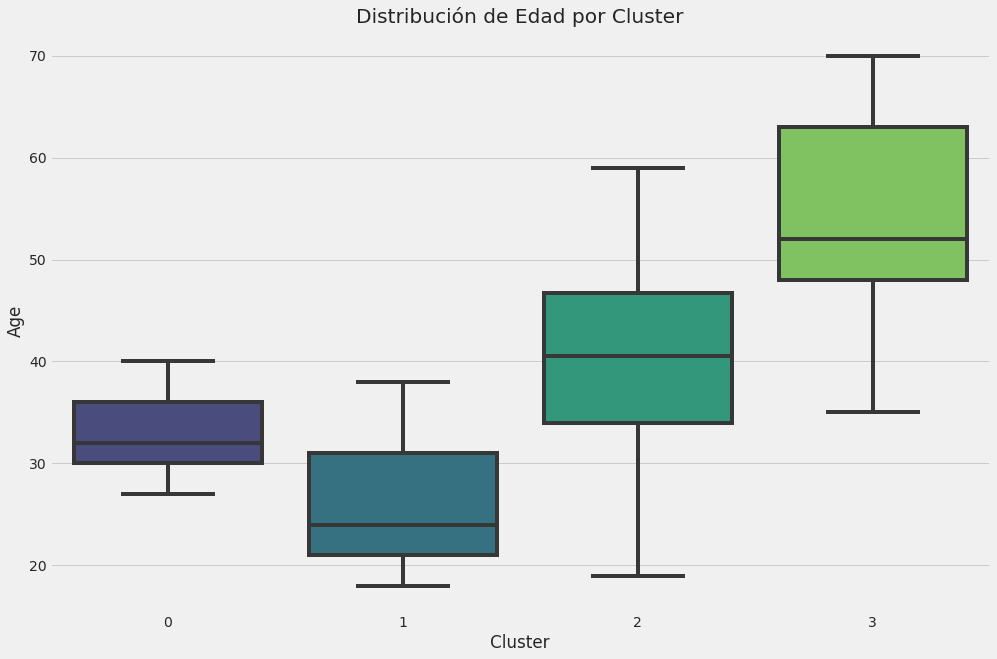

In [0]:

# Análisis adicional: Boxplots de las variables por cluster
plt.figure(figsize=(15, 10))

sns.boxplot(data=df, x='Cluster', y='Age', palette='viridis')
plt.title('Distribución de Edad por Cluster')




Out[34]: Text(0.5, 1.0, 'Distribución de Ingresos Anuales por Cluster')

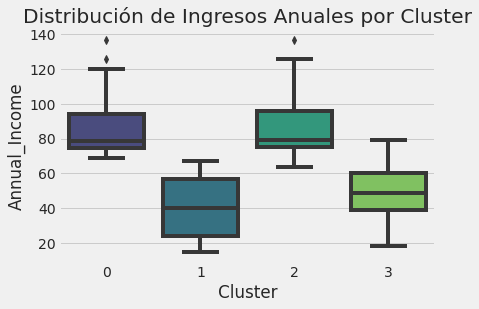

In [0]:

sns.boxplot(data=df, x='Cluster', y='Annual_Income', palette='viridis')
plt.title('Distribución de Ingresos Anuales por Cluster')


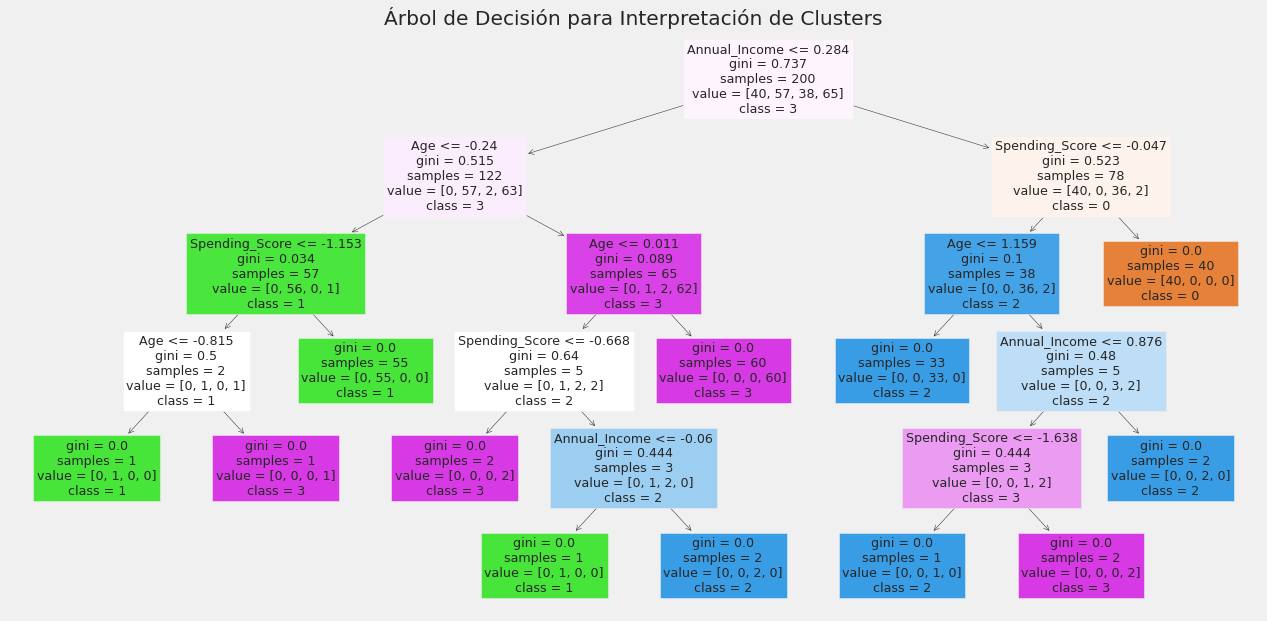

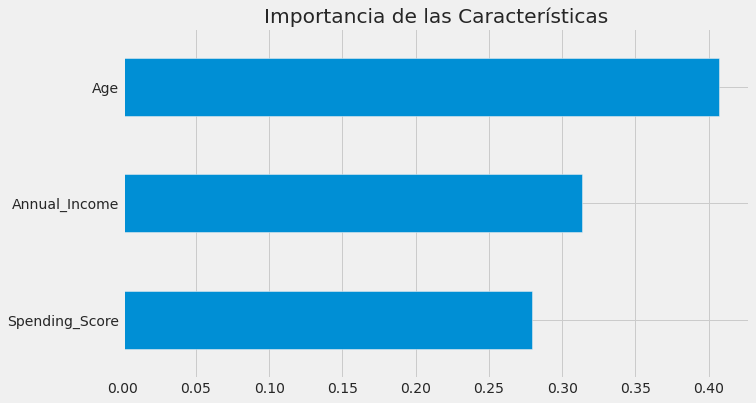

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entrenar un árbol de decisión para interpretar los clusters
tree = DecisionTreeClassifier(random_state=42)
tree.fit(scaled_features, df['Cluster'])

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=['Age', 'Annual_Income', 'Spending_Score'], class_names=[str(i) for i in range(4)], filled=True)
plt.title('Árbol de Decisión para Interpretación de Clusters')
plt.show()

# Importancia de las características
importances = pd.Series(tree.feature_importances_, index=['Age', 'Annual_Income', 'Spending_Score'])
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()